In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), 'build'))
import terraingen as tg
import numpy as np
from matplotlib import pyplot as plt

In [2]:
size = 50

# size is the width of a hex, so 2*a (where a is thelattice constant)
h = 0.5*np.sqrt(3)        # half of hex height in a
n_x = size                # num hexes in x
n_y = np.floor(size/h)    # num hexes in y

# map hex ids for a square map
m_x = np.arange(0,n_x).astype(np.int32)
m_y = np.arange(0,n_y).astype(np.int32)

# real space coords
r_temp_x = np.linspace(0,size,size, endpoint=False).astype(np.float32)
r_temp_y = np.linspace(0,size,size, endpoint=False).astype(np.float32)
r_x, r_y = np.meshgrid(r_temp_x, r_temp_y)
# print(r_y)
r_y[:,1::2] += h   # y of every other column is shifted by h
# print(r_y)
r_x=r_x.flatten()
r_y=r_y.flatten()

print(r_x.shape, r_y.shape)
print(r_x, r_y)

(2500,) (2500,)
[ 0.  1.  2. ... 47. 48. 49.] [ 0.         0.8660254  0.        ... 49.866024  49.        49.866024 ]


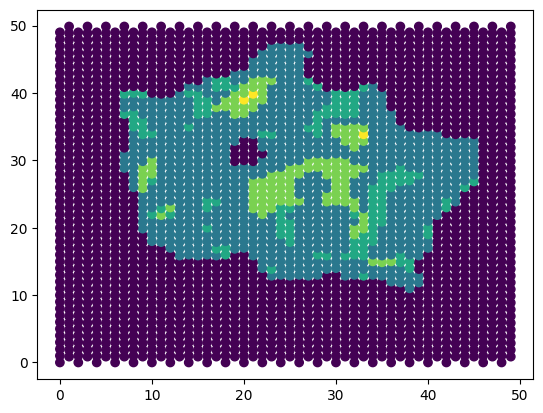

[1 1 1 1 1 1 1 1 1 1]


In [6]:
import importlib
importlib.reload(tg)

gen=tg.Generator()
gen.setSeed(444)
gen.setFreq(0.003*512/size)

# Island
v = gen.getTerrain(r_x, r_y, int(0), float(size), False)
# print(v)

plt.scatter(r_x, r_y, c=v)
plt.show()

print(v[:10])

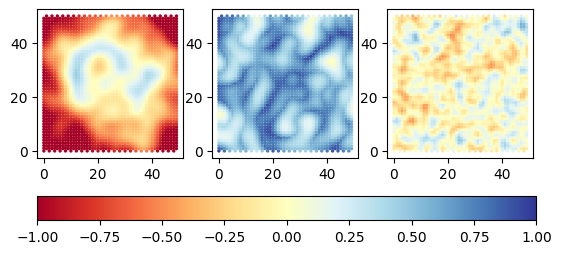

In [7]:
# Island
v = gen.getTerrain(r_x, r_y, int(0), float(size), True)
# print(v)

for i in range(3):
    plt.subplot(2,3,i+1)
    plt.gca().set_aspect('equal', 'box')
    sc = plt.scatter(r_x, r_y, c=v[i], vmin=-1, vmax=1,
                     s=2, cmap='RdYlBu')

plt.subplot(2,3,5)
img = plt.imshow(np.array([[-1,1]]), cmap="RdYlBu")
plt.gca().set_visible(False)
cax = plt.axes([0.125, 0.42, 0.78, 0.05])
plt.colorbar(orientation="horizontal", cax=cax)

plt.show()